# Trabalho 2 - Linguagens de Programação - EEL670 - 21.2

## Bike Sharing Demand
Forecast use of a city bikeshare system

Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.

The data generated by these systems makes them attractive for researchers because the duration of travel, departure location, arrival location, and time elapsed is explicitly recorded. Bike sharing systems therefore function as a sensor network, which can be used for studying mobility in a city. In this competition, participants are asked to combine historical usage patterns with weather data in order to forecast bike rental demand in the Capital Bikeshare program in Washington, D.C.

### 1. Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### 2. Coleta dos dados

In [2]:
# train: dados de treino
train = pd.read_csv("bike-sharing-demand/train.csv")
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
# test: dados de teste
test = pd.read_csv("bike-sharing-demand/test.csv")
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


### 3. Tratamento dos dados

In [4]:
# Verificando a existência de valores null
train.isnull().sum()


datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [5]:
# Verificando a existência de valores null
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [6]:
# Verificando a existência de valores nan
train.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [7]:
# Verificando a existência de valores nan
test.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [8]:
# Verificando os tipos das colunas
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [9]:
# Verificando os tipos das colunas
test.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
dtype: object

In [10]:
train['datetime'] = pd.to_datetime(train['datetime'])

train['year'] = train['datetime'].dt.year
train['quarter'] = train['datetime'].dt.quarter
train['month'] = train['datetime'].dt.month
train['weekofyear'] = train['datetime'].dt.isocalendar().week
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['day_of_week'] = train['datetime'].dt.dayofweek

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,quarter,month,weekofyear,day,hour,day_of_week
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,52,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,52,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,52,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,52,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,52,1,4,5


In [11]:
test['datetime'] = pd.to_datetime(test['datetime'])

test['year'] = test['datetime'].dt.year
test['quarter'] = test['datetime'].dt.quarter
test['month'] = test['datetime'].dt.month
test['weekofyear'] = test['datetime'].dt.isocalendar().week
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['day_of_week'] = test['datetime'].dt.dayofweek

test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,quarter,month,weekofyear,day,hour,day_of_week
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,1,3,20,0,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,1,3,20,1,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,1,3,20,2,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,1,3,20,3,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,1,3,20,4,3


<Axes: >

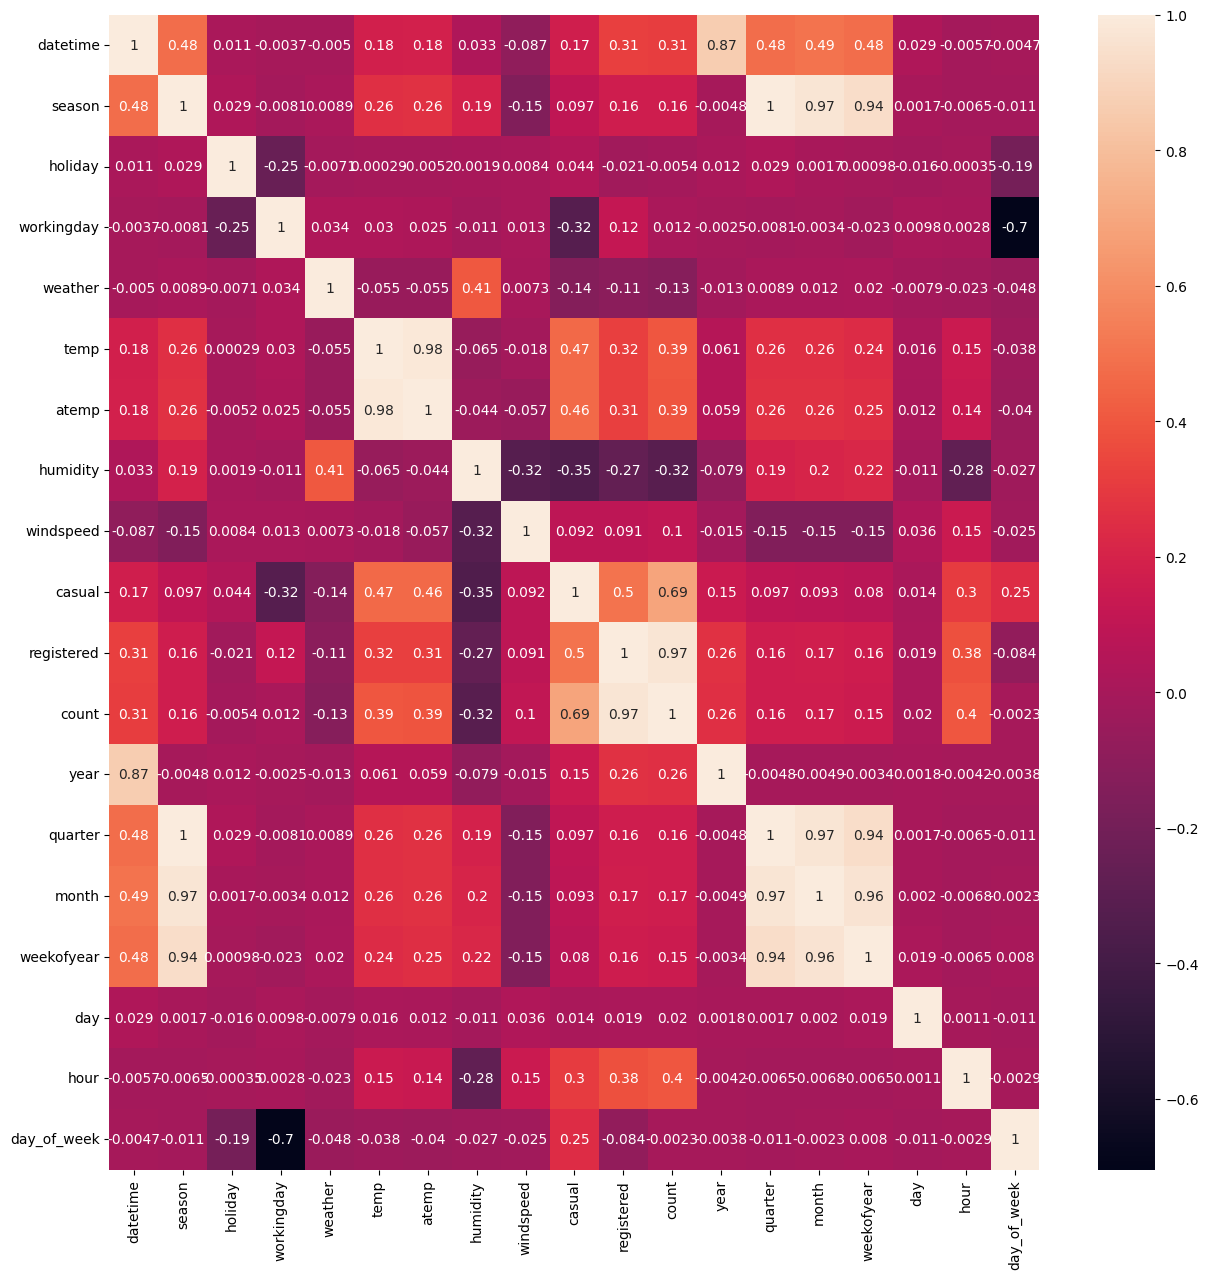

In [12]:
# Observando as novas correlações
correlacao = train.corr()
plt.figure(figsize=(15,15))
sns.heatmap(data=correlacao, annot=True)

### 4. Análise dos dados

In [13]:
# Para ter uma maios noção dos dados
train.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,quarter,month,weekofyear,day,hour,day_of_week
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.0,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,2.506614,6.521495,25.917784,9.992559,11.541613,3.013963
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,1.0,1.000000,0.000000,0.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,2.000000,4.000000,14.0,5.000000,6.000000,1.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,3.000000,7.000000,26.0,10.000000,12.000000,3.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,4.000000,10.000000,40.0,15.000000,18.000000,5.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,4.000000,12.000000,52.0,19.000000,23.000000,6.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,1.116174,3.444373,15.017269,5.476608,6.915838,2.004585


C:\Users\Lucas\AppData\Local\Temp\ipykernel_16292\1281040787.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="hour", y="casual", data=train, palette=palette)


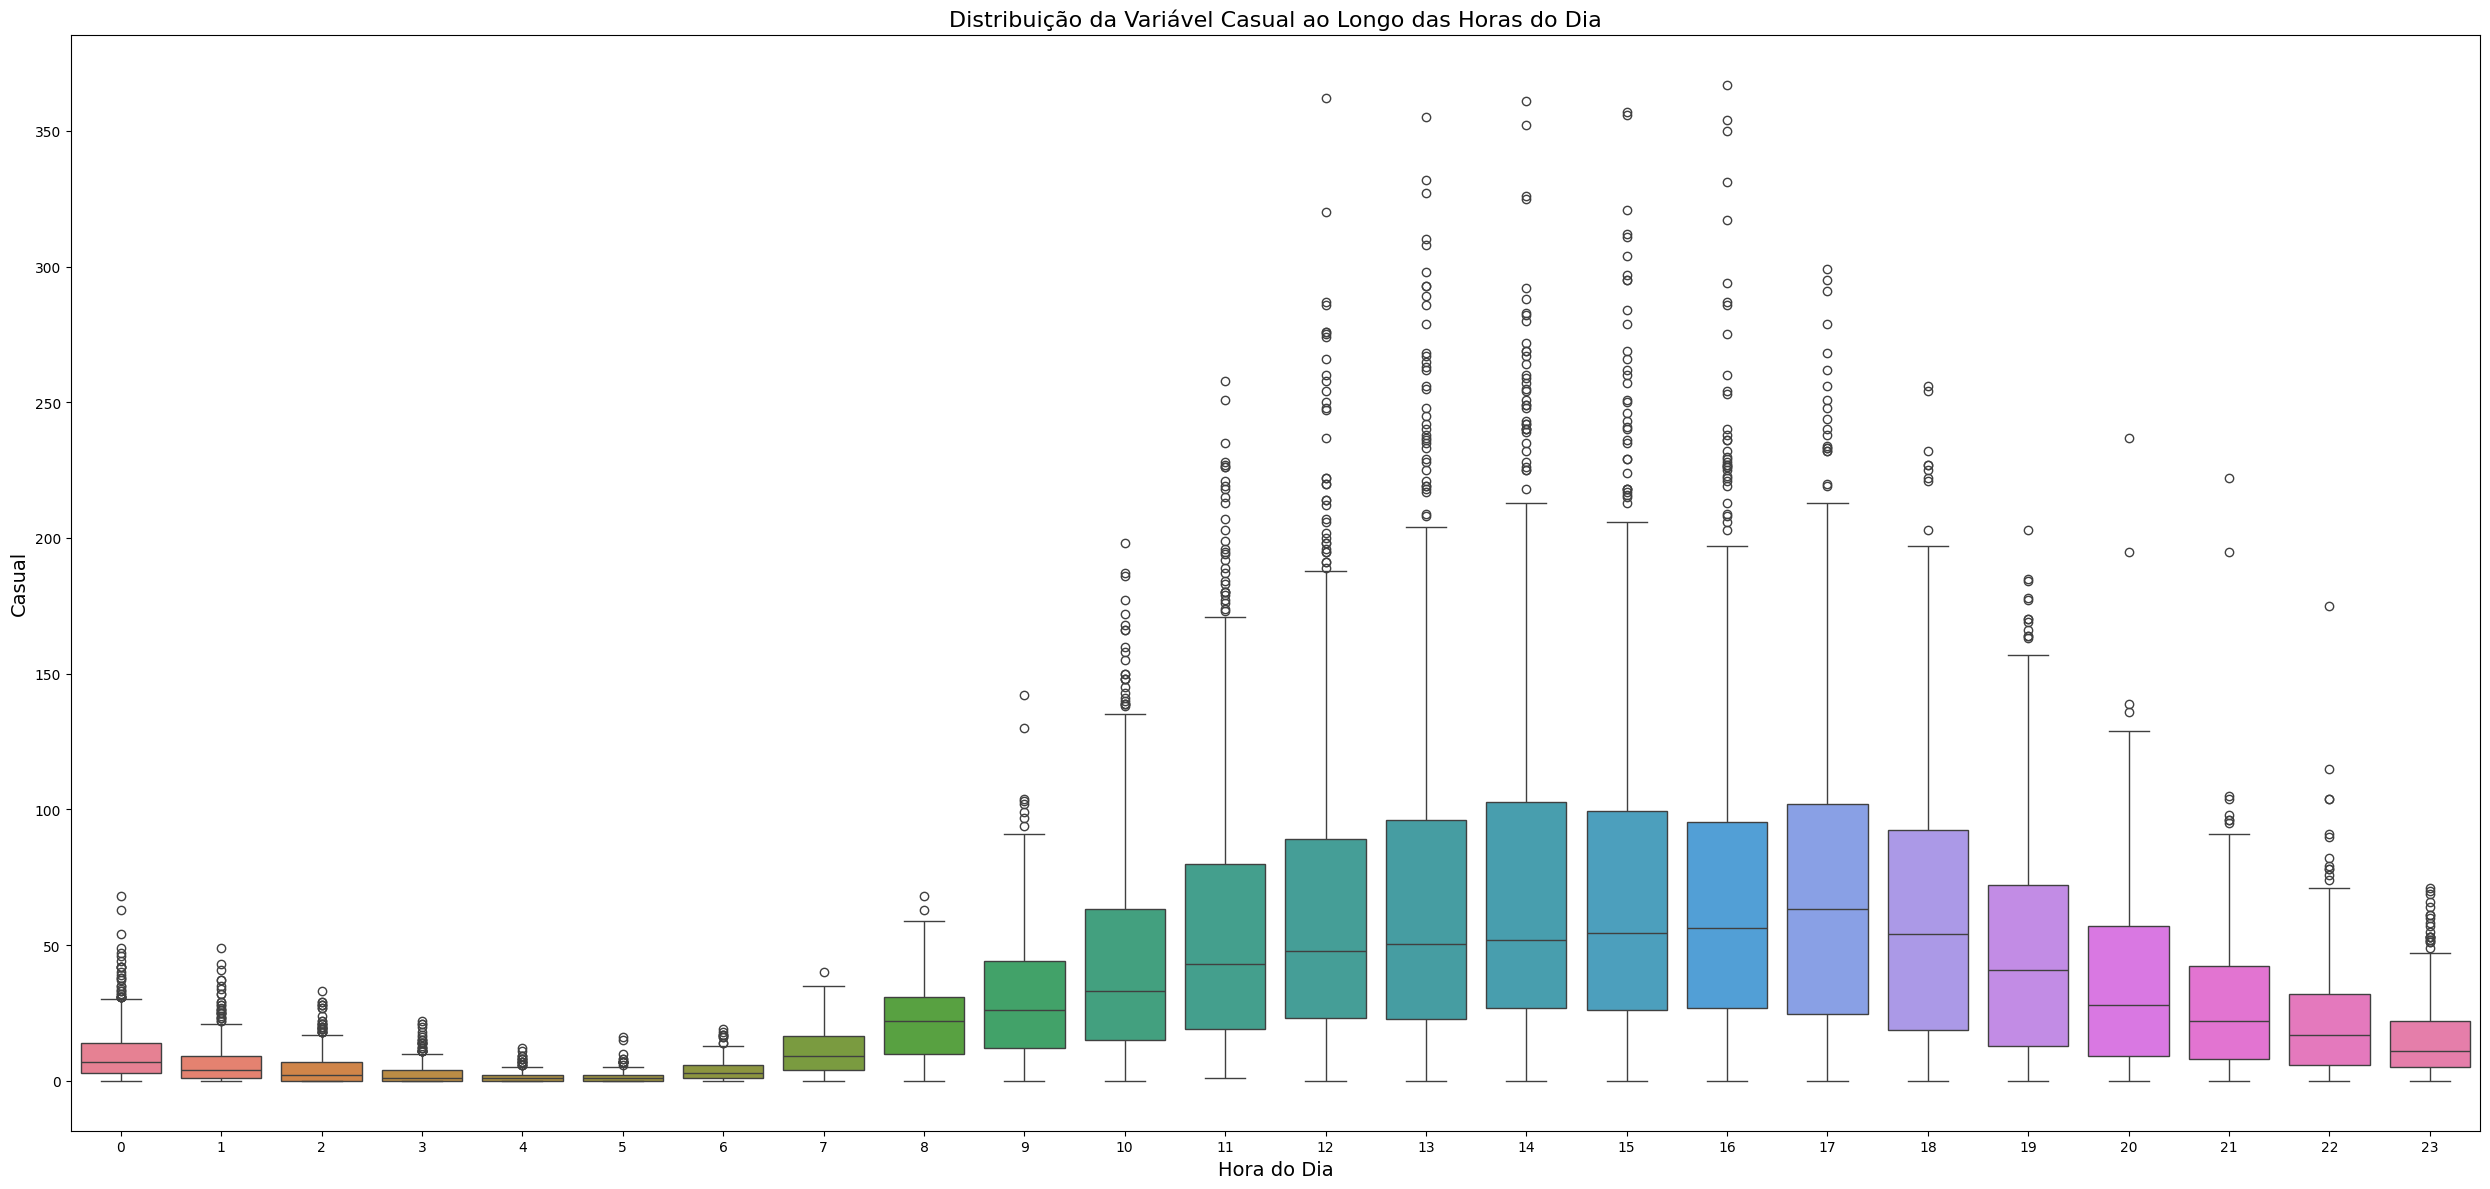

In [14]:
# Ajuste do tamanho da figura
plt.figure(figsize=(25, 12))

# Paleta de cores personalizada
palette = sns.color_palette("husl", 24)

# Boxplot
sns.boxplot(x="hour", y="casual", data=train, palette=palette)

# Título e rótulos dos eixos
plt.title('Distribuição da Variável Casual ao Longo das Horas do Dia', fontsize=16)
plt.xlabel('Hora do Dia', fontsize=14)
plt.ylabel('Casual', fontsize=14)

# Ajuste de layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

C:\Users\Lucas\AppData\Local\Temp\ipykernel_16292\2591478274.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="hour", y="registered", data=train, palette=palette)


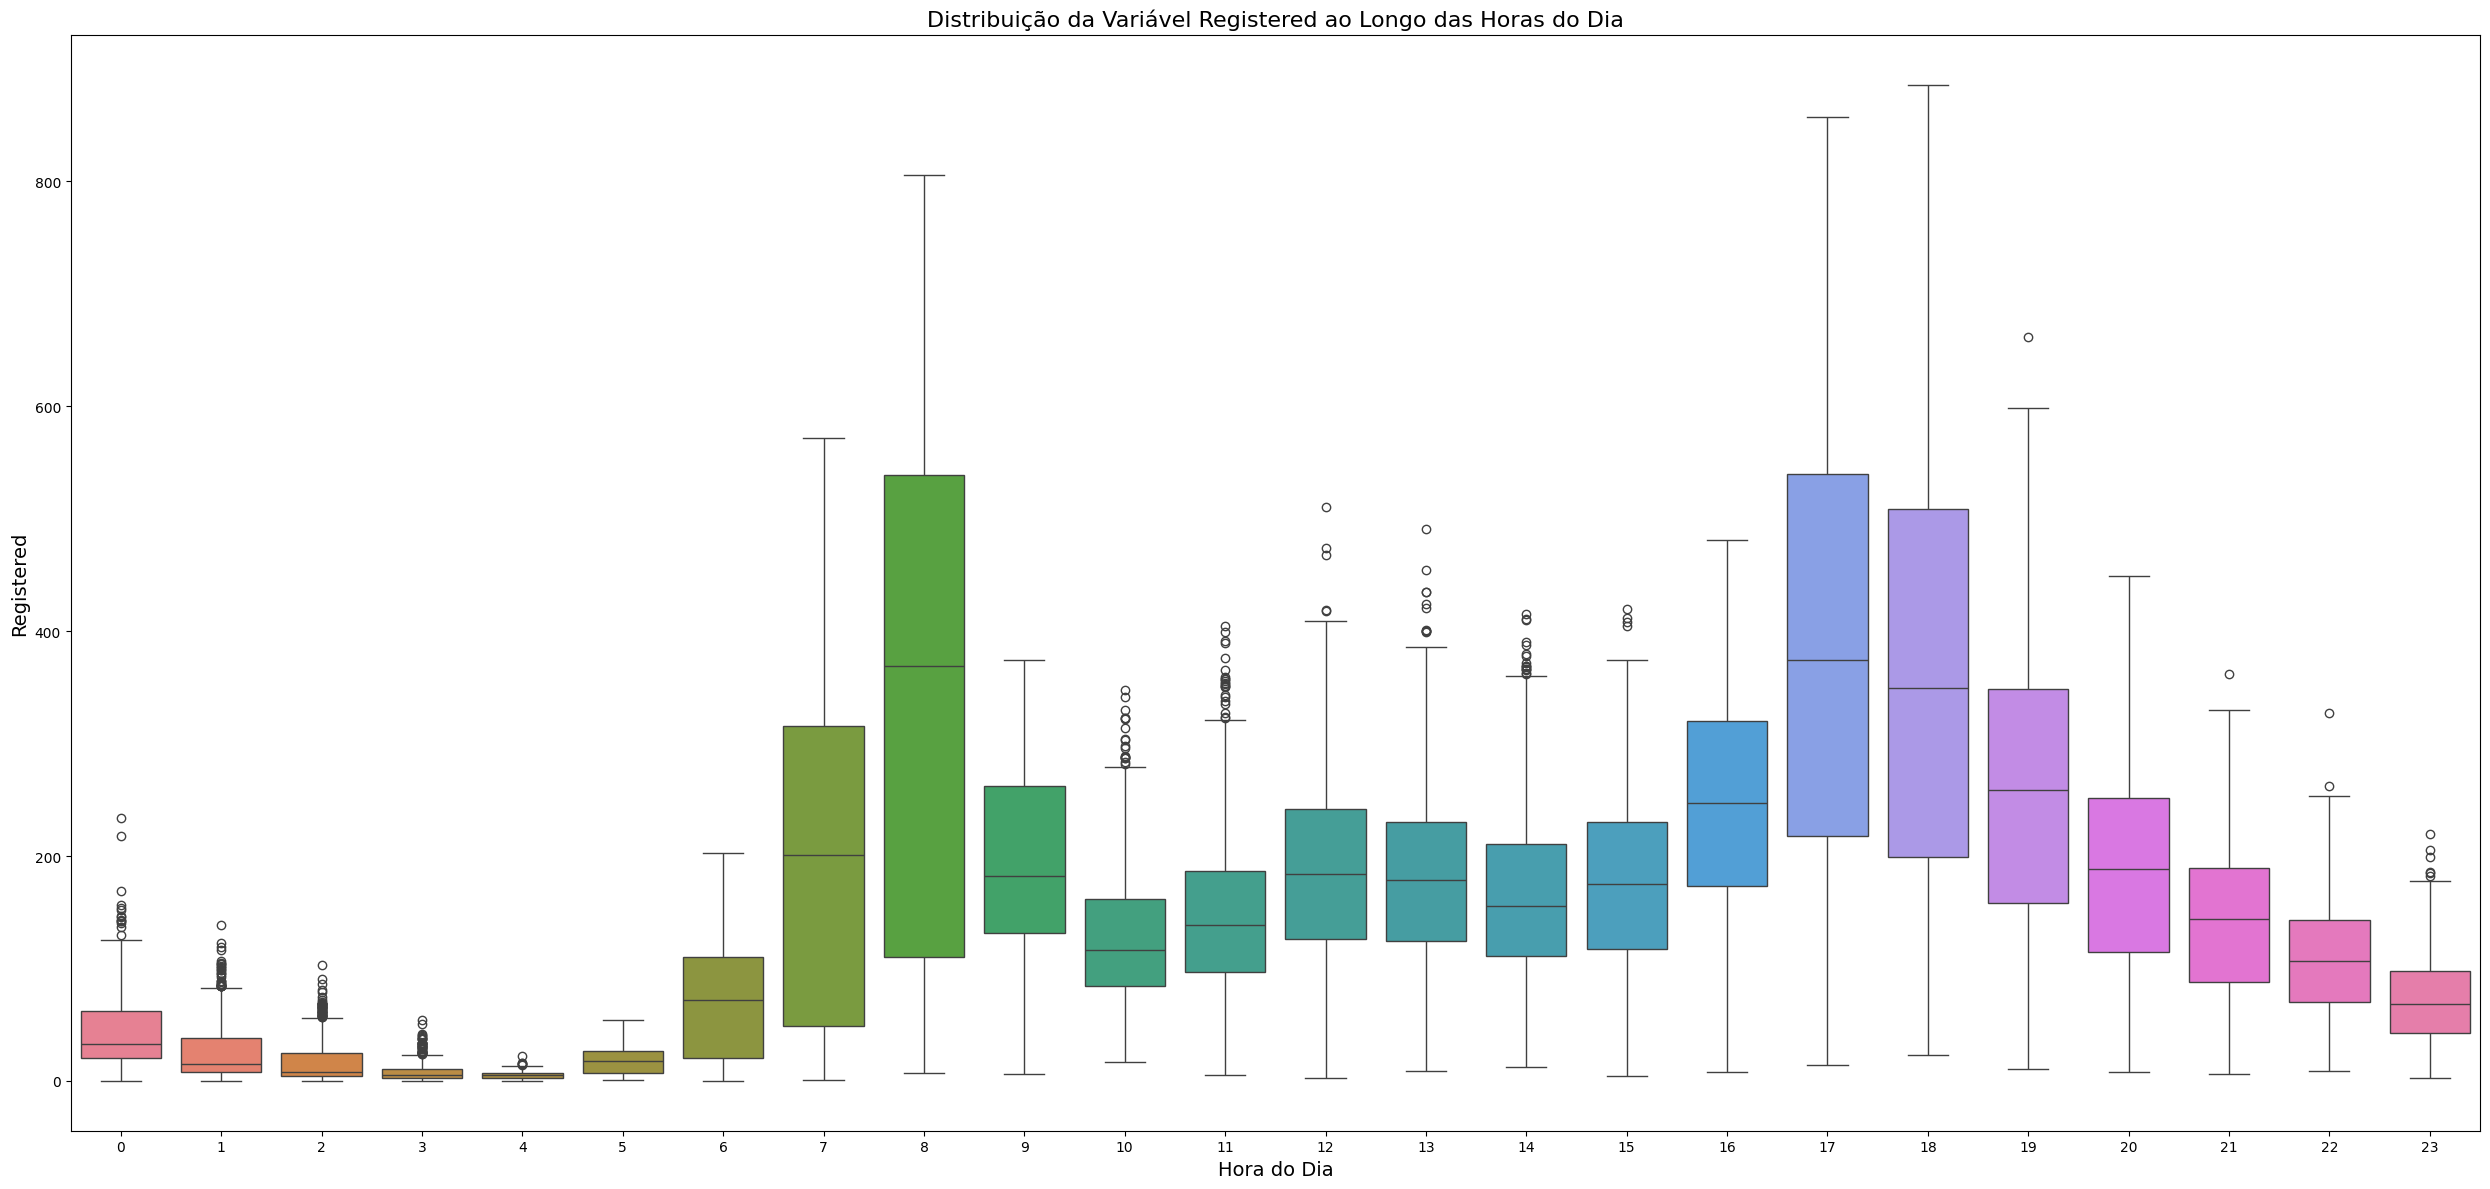

In [15]:
# Ajuste do tamanho da figura
plt.figure(figsize=(25, 12))

# Paleta de cores personalizada
palette = sns.color_palette("husl", 24)

# Boxplot
sns.boxplot(x="hour", y="registered", data=train, palette=palette)

# Título e rótulos dos eixos
plt.title('Distribuição da Variável Registered ao Longo das Horas do Dia', fontsize=16)
plt.xlabel('Hora do Dia', fontsize=14)
plt.ylabel('Registered', fontsize=14)

# Ajuste de layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

### 5. Criação dos modelos de previsão

In [16]:
# Separando as tabelas de teste e treino
x_train = train.drop(columns=['datetime', 'casual', 'registered', 'count'])
y_train_casual = train["casual"]

x_train = train.drop(columns=['datetime', 'casual', 'registered', 'count'])
y_train_registered = train["registered"]

x_test = test.drop(columns=['datetime'])

In [18]:
# Para predizer os usuários casuais
casual_dec = RandomForestRegressor(n_estimators=500, random_state=42)
casual_dec.fit(x_train, y_train_casual)

# Para predizer os usuários registrados
registered_dec = RandomForestRegressor(n_estimators=500, random_state=42)
registered_dec.fit(x_train, y_train_registered)


RandomForestRegressor(n_estimators=500, random_state=42)

In [19]:
# Predizendo os valores
y_train_casual = casual_dec.predict(x_train).astype(int)
y_train_registered = registered_dec.predict(x_train).astype(int)

# Substituir valores negativos por zero
y_train_casual = np.maximum(y_train_casual, 0)
y_train_registered = np.maximum(y_train_registered, 0)
y_train_pred = y_train_casual + y_train_registered

# Calcular o Root Mean Squared Logarithmic Error (RMSLE)
def rmsle(y_true, y_pred):
    log_y_true = np.log1p(y_true)
    log_y_pred = np.log1p(y_pred)
    squared_errors = (log_y_true - log_y_pred) ** 2
    mean_squared_errors = np.mean(squared_errors)
    rmsle = np.sqrt(mean_squared_errors)
    return rmsle

# Calcular o Mean Absolute Error (MAE)
mae = mean_absolute_error(train['count'], y_train_pred)
print("Mean Absolute Error (MAE):", mae)

# Calcular o Mean Squared Error (MSE)
mse = mean_squared_error(train['count'], y_train_pred)
print("Mean Squared Error (MSE):", mse)

# Calcular o Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calcular o Coeficiente de Determinação (R²)
r2 = r2_score(train['count'], y_train_pred)
print("Coefficient of Determination (R²):", r2)

rmsle_value = rmsle(train['count'], y_train_pred)
print("Root Mean Squared Logarithmic Error (RMSLE):", rmsle_value)

Mean Absolute Error (MAE): 8.226253904097005
Mean Squared Error (MSE): 189.0513503582583
Root Mean Squared Error (RMSE): 13.749594552504387
Coefficient of Determination (R²): 0.9942380485159927
Root Mean Squared Logarithmic Error (RMSLE): 0.13479645726195166


### 6. Aplicação dos modelos de previsão nos dados de teste

In [20]:
# Predizendo os valores
y_test_casual = casual_dec.predict(x_test).astype(int)
y_test_registered = registered_dec.predict(x_test).astype(int)

# Substituir valores negativos por zero
y_test_casual = np.maximum(y_test_casual, 0)
y_test_registered = np.maximum(y_test_registered, 0)


In [21]:
# Finalmente a coluna "count"
y_test_count = y_test_casual + y_test_registered

In [22]:
# Criando a tabela de submissão
submited = pd.DataFrame()

submited["datetime"] = test["datetime"]
submited["count"] = y_test_count

submited.set_index("datetime", inplace=True)

In [23]:
submited.head()

,count
datetime,
2011-01-20 00:00:00,14
2011-01-20 01:00:00,6
2011-01-20 02:00:00,5
2011-01-20 03:00:00,2
2011-01-20 04:00:00,1


In [24]:
submited.to_csv("Submission.csv")